<a href="https://colab.research.google.com/github/Loc203/IMDb-Predict/blob/main/IMDb_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/dataset'

Mounted at /content/gdrive
/content/gdrive/MyDrive/dataset


**Read dataset**

In [ ]:
movies = pd.read_csv('movies.csv')
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


**Lấy Data type của các feature**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**Kiểm tra các giá trị NULL**

In [ ]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

**Xử lý giá trị NULL**

xóa các hàng chứa giá trị null

In [ ]:
movies = movies.dropna(axis=0,  subset=['budget'])
movies = movies.dropna(axis=0,  subset=['gross'])
movies = movies.dropna(axis=0, subset=['country','company','runtime'])

In [ ]:
movies['rating'].value_counts()
movies['rating'] = movies['rating'].fillna('R')

sau khi xử lý ta có thể thấy dữ liệu không còn các giá trị null

In [ ]:
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [ ]:
movies.reset_index(inplace = True, drop = True)

Xóa các cột có giá trị không cần thiết

In [ ]:
movies = movies.drop('name', axis=1)
movies['writer'].nunique()
movies['director'].nunique()
movies['star'].nunique()
movies['released'].nunique()
movies['company'].nunique()
movies['country'].nunique()
movies = movies.drop(['writer','director','star','released','company'], axis=1)

In [ ]:
movies.head()

,rating,genre,year,score,votes,country,budget,gross,runtime
0,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0


biểu đồ Rating

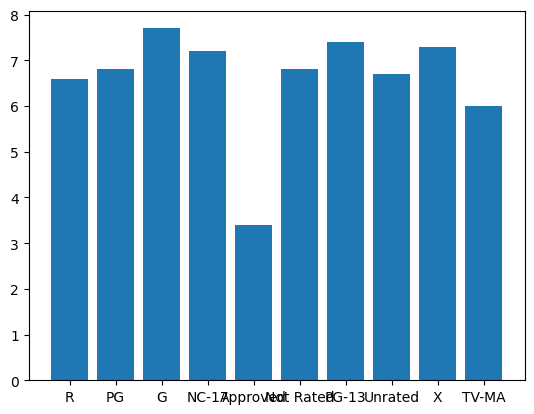

In [ ]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['rating'].nunique())
leng = len(movies['rating'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['rating'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['rating'][i]):
                index = j
    else:
        rating_arr.append(movies['rating'][i])
        ratings.append(movies['rating'][i])
        index = len(rating_arr)-1

    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

biểu đồ Genre

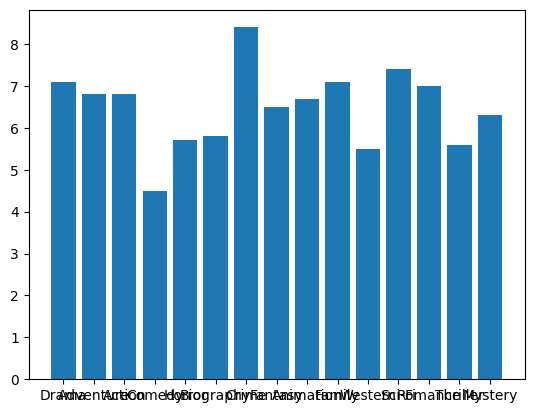

In [ ]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['genre'].nunique())
leng = len(movies['genre'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['genre'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['genre'][i]):
                index = j
    else:
        rating_arr.append(movies['genre'][i])
        ratings.append(movies['genre'][i])
        index = len(rating_arr)-1

    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

biểu đồ Country

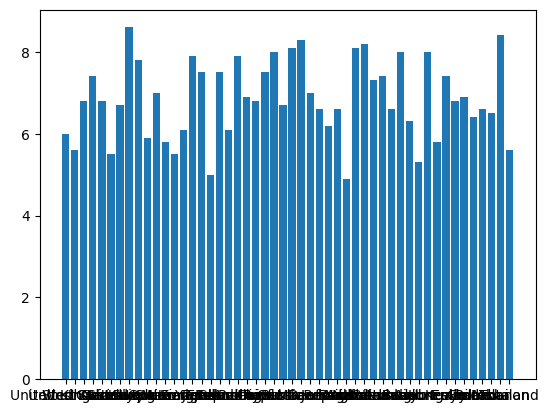

In [ ]:
ratings = [[]]
rating_arr = []
scores  = []
scores_arr = np.zeros(movies['country'].nunique())
leng = len(movies['country'])
for i in range(0,leng):
    if(np.isin(rating_arr,movies['country'][i]).any()):
        index = 0
        for j in range(0,len(rating_arr)):
            if(rating_arr[j] == movies['country'][i]):
                index = j
    else:
        rating_arr.append(movies['country'][i])
        ratings.append(movies['country'][i])
        index = len(rating_arr)-1

    scores_arr[index] = movies['score'][i]

for i in range(0,len(rating_arr)):
    scores.append(np.mean(scores_arr[i]))

xpoints = np.array(rating_arr)
ypoints = np.array(scores)

plt.bar(xpoints,ypoints)
plt.show()

Contry, Rating và Genre sẽ bị loại bỏ vì không ảnh hưởng đến kết quả

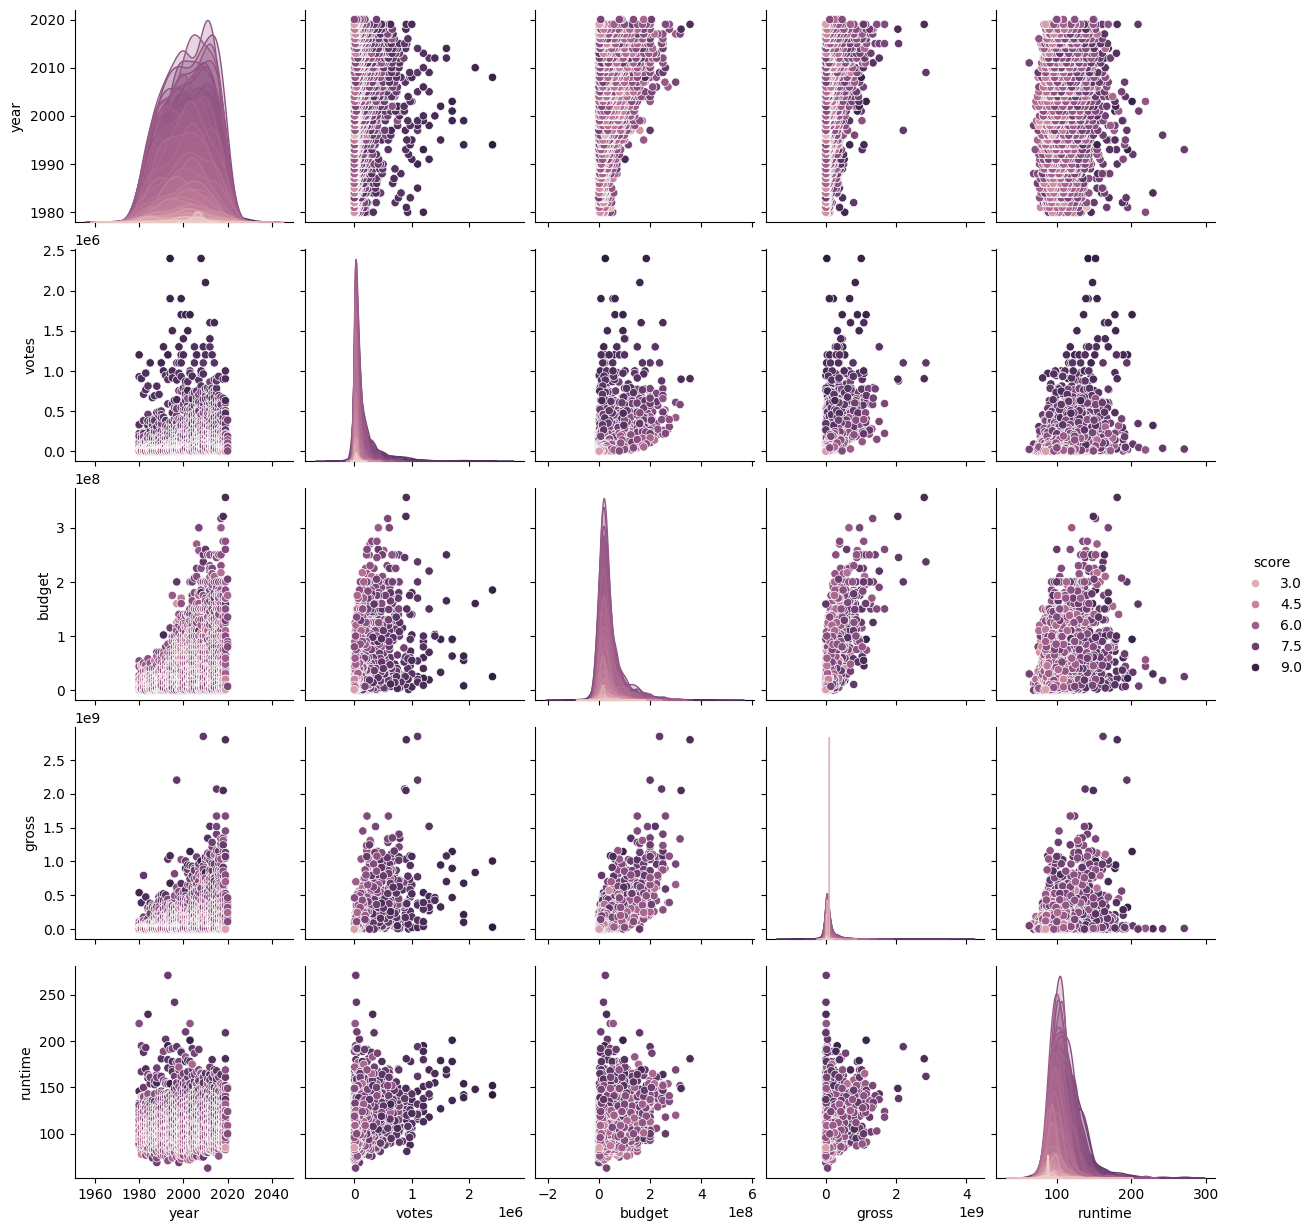

In [ ]:
movies = movies.drop(['country','rating','genre'], axis=1)
sns.pairplot(movies, hue="score")
plt.show()

**Kiểm tra mức độ cân bằng của score**

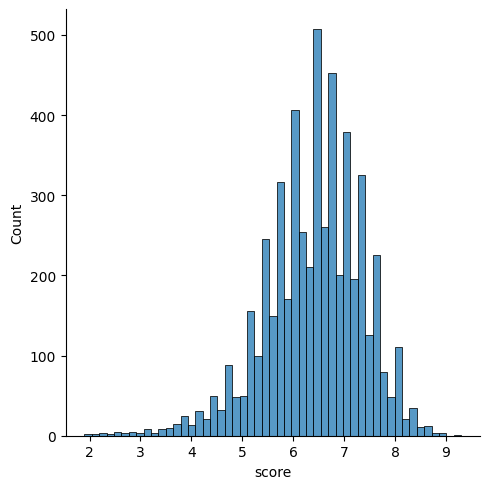

In [ ]:
sns.displot(movies["score"])
plt.show()

Dữ liệu score không được cân bằng, độ lệch cao

In [ ]:
movies_scaled = preprocessing.normalize(movies)
names = ['year','score','votes','budget','gross','runtime']
#movies = pd.DataFrame(movies_scaled,columns=names)
movies

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...
5427,2020,6.6,140000.0,90000000.0,426505244.0,124.0
5428,2020,6.5,102000.0,85000000.0,319715683.0,99.0
5429,2020,5.6,53000.0,175000000.0,245487753.0,101.0
5430,2020,6.8,42000.0,135000000.0,111105497.0,100.0


In [ ]:
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000


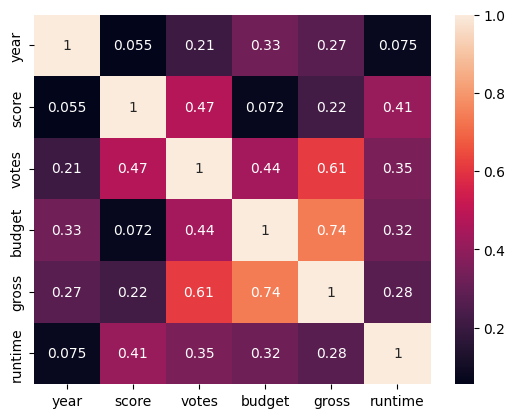

In [ ]:
heatmap = sns.heatmap(movies.corr(),annot=True)

**Thử huấn luyện mô hình**

In [ ]:
scaler = StandardScaler()
X = movies.drop(columns=['score'])
y = movies['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mô hình RandomForest

In [ ]:
model = RandomForestRegressor(n_estimators = 500)

# Huấn luyện mô hình
print('Random Forest')
model.fit(X_train,y_train)

# Đánh giá mô hình
print('Test Score:')
predicted = model.predict(X_test)
print('MSE: ',metrics.mean_squared_error(y_test,predicted))
print('MAE: ',metrics.mean_absolute_error(y_test,predicted))
print('R2: ',r2_score(y_test,predicted))

print('Train Score:')
predicted = model.predict(X_train)
print('MSE: ',metrics.mean_squared_error(y_train,predicted))
print('MAE: ',metrics.mean_absolute_error(y_train,predicted))
print('R2: ',r2_score(y_train,predicted))

Random Forest
Test Score:
MSE:  0.4802374097516093
MAE:  0.49111315547378126
R2:  0.4837557875444559
Train Score:
MSE:  0.06306155617951688
MAE:  0.18372556962025352
R2:  0.9319633903630741


Mô hình CNN

In [ ]:
# Chuyển đổi dữ liệu thành định dạng mà CNN có thể xử lý
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)

# Đánh giá mô hình
print('CNN')
print('Test Score:')
predicted = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('MAE: ', mean_absolute_error(y_test, predicted))
print('R2: ', r2_score(y_test, predicted))

print('Train Score:')
predicted = model.predict(X_train)
print('MSE: ', mean_squared_error(y_train, predicted))
print('MAE: ', mean_absolute_error(y_train, predicted))
print('R2: ', r2_score(y_train, predicted))

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 10.2957 - val_loss: 2.2597
Epoch 2/100
109/109 [==============================] - 0s 3ms/step - loss: 1.6303 - val_loss: 1.2456
Epoch 3/100
109/109 [==============================] - 0s 3ms/step - loss: 0.9797 - val_loss: 0.8487
Epoch 4/100
109/109 [==============================] - 0s 3ms/step - loss: 0.7159 - val_loss: 0.6353
Epoch 5/100
109/109 [==============================] - 0s 3ms/step - loss: 0.6022 - val_loss: 0.5450
Epoch 6/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5549 - val_loss: 0.5158
Epoch 7/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5385 - val_loss: 0.4920
Epoch 8/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5279 - val_loss: 0.4801
Epoch 9/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5181 - val_loss: 0.4759
Epoch 10/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5131 - val_l

**Nhận xét**

Kết quả thu được từ 2 mô hình ở mức tạm ổn

Sự chênh lệch về điểm đánh giá của RandomForest và CNN ở Test Score không có quá nhiều khác biệt

Nhưng ở Train Score có thể thấy mô hình RandomForest có điểm vượt trội hơn hẳn so với CNN

**Tổng kết**

Random Forest có hiệu suất tốt hơn so với CNN. Mô hình Random Forest có R² cao và MSE, MAE thấp, cho thấy khả năng giải thích và dự đoán tốt hơn.

**Huấn luyện mô hình sau khi cân bằng dữ liệu**

Dữ liệu chưa được cân bằng nên kết quả huấn luyện mô hình trước đó chưa được tốt.

Vì thế ở phần này, những dữ liệu không nằm trong phạm vi 6-7, sẽ được cân bằng bằng cách lấy mẫu quá mức.

In [ ]:
nine_to_ten = movies[movies['score'] > 9]
nine_to_ten = nine_to_ten[nine_to_ten['score'] <=10 ]

eight_to_nine = movies[movies['score'] > 8]
eight_to_nine = eight_to_nine[eight_to_nine['score'] <=9 ]

seven_to_eight = movies[movies['score'] > 7]
seven_to_eight = seven_to_eight[seven_to_eight['score'] <=8 ]

six_to_seven = movies[movies['score'] > 6]
six_to_seven = six_to_seven[six_to_seven['score'] <=7 ]

five_to_six = movies[movies['score'] > 5]
five_to_six = five_to_six[five_to_six['score'] <=6 ]

four_to_five = movies[movies['score'] > 4]
four_to_five = four_to_five[four_to_five['score'] <=5 ]

three_to_four = movies[movies['score'] > 3]
three_to_four = three_to_four[three_to_four['score'] <=4 ]

two_to_three = movies[movies['score'] > 2]
two_to_three = two_to_three[two_to_three['score'] <=3 ]

one_to_two = movies[movies['score'] > 1]
one_to_two = one_to_two[one_to_two['score'] <=2 ]


nine_to_ten_count = len(nine_to_ten)
eight_to_nine_count = len(eight_to_nine)
seven_to_eight_count = len(seven_to_eight)
six_to_seven_count = len(six_to_seven)
five_to_six_count = len(five_to_six)
four_to_five_count = len(four_to_five)
three_to_four_count = len(three_to_four)
two_to_three_count = len(two_to_three)
one_to_two_count = len(one_to_two)

nine_to_ten_over = resample(nine_to_ten,replace=True,n_samples=500)
eight_to_nine_over = resample(eight_to_nine,replace=True,n_samples=seven_to_eight_count)
seven_to_eight_over = resample(seven_to_eight,replace=True,n_samples=seven_to_eight_count)
six_to_seven_under = resample(six_to_seven,replace=True,n_samples=seven_to_eight_count)
five_to_six_over = resample(five_to_six,replace=True,n_samples=seven_to_eight_count)
four_to_five_over = resample(four_to_five,replace=True,n_samples=seven_to_eight_count)
three_to_four_over = resample(three_to_four,replace=True,n_samples=seven_to_eight_count)
two_to_three_over = resample(two_to_three,replace=True,n_samples=seven_to_eight_count)
one_to_two_over = resample(one_to_two,replace=True,n_samples=500)

movies_oversampled = pd.concat([nine_to_ten_over, eight_to_nine_over, seven_to_eight_over, six_to_seven_under, five_to_six_over, four_to_five_over, three_to_four_over, two_to_three_over, one_to_two_over]).reset_index(drop=True)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = movies_oversampled.values.tolist()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)
X = X_scaled_df.values.tolist()

y=[]
for row in X:
    y.append((row[1]))
    del row[1]
X=pd.Series(X).tolist()
y=pd.Series(y).tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

Huấn luyện theo mô hình RandomForest

In [ ]:
model = RandomForestRegressor(n_estimators = 500)

# Huấn luyện mô hình
print('Random Forest')
model.fit(X_train,y_train)

# Đánh giá mô hình
print('Test Score:')
predicted = model.predict(X_test)
print('MSE: ',metrics.mean_squared_error(y_test,predicted))
print('MAE: ',metrics.mean_absolute_error(y_test,predicted))
print('R2: ',r2_score(y_test,predicted))

print('Train Score:')
predicted = model.predict(X_train)
print('MSE: ',metrics.mean_squared_error(y_train,predicted))
print('MAE: ',metrics.mean_absolute_error(y_train,predicted))
print('R2: ',r2_score(y_train,predicted))

Random Forest
Test Score:
MSE:  0.002407579912002535
MAE:  0.02138283833026232
R2:  0.9719665286471569
Train Score:
MSE:  0.0002929423991918281
MAE:  0.0075812675471627405
R2:  0.9965907264825741


Huấn luyện theo mô hình CNN

In [ ]:
# Chuyển đổi dữ liệu thành định dạng mà CNN có thể xử lý
X_train = np.array(X_train).reshape((len(X_train), len(X_train[0]), 1))
X_test = np.array(X_test).reshape((len(X_test), len(X_test[0]), 1))

# Convert y_train to a NumPy array
y_train = np.array(y_train)  # Chuyển đổi y_train thành NumPy array

# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)

# Đánh giá mô hình
print('CNN')
print('Test Score:')
predicted = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, predicted))
print('MAE: ', mean_absolute_error(y_test, predicted))
print('R2: ', r2_score(y_test, predicted))

print('Train Score:')
predicted = model.predict(X_train)
print('MSE: ', mean_squared_error(y_train, predicted))
print('MAE: ', mean_absolute_error(y_train, predicted))
print('R2: ', r2_score(y_train, predicted))

Epoch 1/100
193/193 [==============================] - 3s 6ms/step - loss: 0.0559 - val_loss: 0.0405
Epoch 2/100
193/193 [==============================] - 1s 5ms/step - loss: 0.0371 - val_loss: 0.0362
Epoch 3/100
193/193 [==============================] - 1s 7ms/step - loss: 0.0330 - val_loss: 0.0323
Epoch 4/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0295 - val_loss: 0.0307
Epoch 5/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0276 - val_loss: 0.0274
Epoch 6/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0264 - val_loss: 0.0280
Epoch 7/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0263 - val_loss: 0.0271
Epoch 8/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0252 - val_loss: 0.0259
Epoch 9/100
193/193 [==============================] - 1s 4ms/step - loss: 0.0247 - val_loss: 0.0272
Epoch 10/100
193/193 [==============================] - 1s 3ms/step - loss: 0.0241 - val_lo

**Kết luận**

Bài báo cáo đã trình bày một số kỹ thuật được áp dung vào việc dự đoán điểm đánh giá IMDb của 1 bộ phim. Theo đó 2 thuật toán RandomForest và CNN đã được áp dụng. Kết quả đánh giá mô hình đã cho thấy thuật toán RandomForest cho ra kết quả tốt hơn so với CNN